In [1]:
import mat4py
import os
import shutil
import random
import pandas as pd
from PIL import Image

In [2]:
anno_path = '/run/media/geoffrey/Timbersaw/DataSet/dataset/RAP2.0/RAP_annotation/RAP_annotation.mat'
img_path = '/run/media/geoffrey/Timbersaw/DataSet/dataset/RAP2.0/RAP_dataset'

In [3]:
data = mat4py.loadmat(anno_path)['RAP_annotation']

In [4]:
data.keys()

dict_keys(['name', 'data', 'attribute', 'selected_attribute', 'partition_attribute', 'person_identity', 'partition_reid'])

In [5]:
t = pd.DataFrame(zip(data['name'], data['person_identity'])).applymap(lambda x:x[0])
data_choose = t[t[1] > 0]
data_choose[1].min()

1

In [6]:
for a,id in data_choose.values:
    temp = a.split("-")
    camid = temp[0].strip('CAM')
    frame = temp[7].strip('frame')

    new_name = 'Rein_id_rap/' + '_'.join([str(int(id)+2542), f'c{camid}s{random.randint(0, 9)}', 
                         frame.zfill(6), f'{random.randint(1, 9)}'.zfill(2)]) + '.jpg'
    img = Image.open(os.path.join(img_path, a)).convert('RGB')
    img.save(new_name)

In [48]:
temp = a.split("-")
camid = temp[0].strip('CAM')
frame = temp[7].strip('frame')

In [50]:
new_name = 'Rein_id/' + '_'.join([str(int(id)+2542), f'c{camid}s{random.randint(0, 9)}', 
                     frame.zfill(6), f'{random.randint(1, 9)}'.zfill(2)]) + '.jpg'
new_name

'Rein_id/4907_c31s5_002823_09.jpg'

In [51]:
img = Image.open(os.path.join(img_path, a)).convert('RGB')

img.save(new_name)

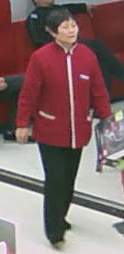

In [34]:
display(img)